In [1]:
# !pip install spotipy
# !pip install chart_studio
# !pip install plotly

In [1]:
# Import libraries section

import chart_studio.plotly as py
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import psycopg2
import seaborn as sns
import spotipy


from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from spotipy.oauth2 import SpotifyClientCredentials


In [3]:
client_credentials_manager = SpotifyClientCredentials(client_id=spotify_client_id, client_secret=spotify_client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [45]:
conn = psycopg2.connect(elephant_credencials )
songs = pd.read_sql_query('SELECT * FROM songs', conn)
users = pd.read_sql_query('SELECT * FROM users', conn)
conn.close()

In [5]:
# chart_studio.tools.set_credentials_file(username='CodingDuckmx', api_key='BJDTaHirN1qxM6uaTXhS')

In [ ]:
songs = songs.drop(labels='id', axis=1)
print(songs.shape)
songs.head()

In [48]:
########################### Sampling ###########################

songs = songs.sample(frac=0.3, random_state=42)

songs = songs.reset_index(drop=True)

print(songs.shape)
songs.head()

########################### Sampling ###########################

(6445, 23)


,song_id,song_name,artists,album,popularity,explicit,track_number,danceability,energy,song_key,...,acousticness,instrumentalness,liveness,valence,tempo,song_type,duration_ms,time_signature,preview_url,similar_songs
0,5vZfAY2ZJjx4UDGbWFVkP3,Make My Body Rock 1990,Jomanda,Someone To Love Me,26,False,1,0.799,0.702,5.0,...,0.00605,0.008740,0.0356,0.964,122.932,audio_features,240173,4,https://p.scdn.co/mp3-preview/e7b8ecb49ab40b92...,None
1,7y9gbZ9CUnYkpBK4q0qnjB,La fête,Amir,La fête,66,False,1,0.758,0.582,10.0,...,0.21500,0.000000,0.1290,0.824,98.096,audio_features,192857,4,https://p.scdn.co/mp3-preview/36a877d1697c9f60...,None
2,0aHfQj7uRDW4Jzm9aH397f,These Boots Are Made for Walkin' - Radio Edit,Velvet 99,These Boots Are Made for Walking - Ep,22,False,1,0.688,0.885,5.0,...,0.00254,0.000026,0.3840,0.450,168.504,audio_features,219376,4,https://p.scdn.co/mp3-preview/dd1747cdb60dffb4...,None
3,7pxs0seevgCsp3h23lUGBw,Corazón Solitario,Alberto Pedraza,Guarachando,57,False,1,0.506,0.589,0.0,...,0.11900,0.004720,0.1390,0.884,199.849,audio_features,243458,4,https://p.scdn.co/mp3-preview/6583ed51d023b20b...,None
4,2jvdhLaMhxGpOqb9DllX1x,Reste avec moi,Pépite,Reste avec moi,36,False,1,0.416,0.661,9.0,...,0.00460,0.007130,0.6190,0.288,148.033,audio_features,214133,4,https://p.scdn.co/mp3-preview/35104895441bef2b...,None


In [49]:
# Drop duplicates if any

songs = songs.drop_duplicates(['song_id'])
songs.shape

(6445, 23)

In [50]:
features = ['acousticness','danceability','energy','instrumentalness',
                      'song_key', 'liveness', 'loudness','song_mode','speechiness', 'tempo',
                      'time_signature','valence']
songs[features] = songs[features].astype(float)
songs_features = songs[features].astype(float)
songs_features.head()

,acousticness,danceability,energy,instrumentalness,song_key,liveness,loudness,song_mode,speechiness,tempo,time_signature,valence
0,0.00605,0.799,0.702,0.008740,5.0,0.0356,-12.809,0.0,0.0365,122.932,4.0,0.964
1,0.21500,0.758,0.582,0.000000,10.0,0.1290,-6.233,0.0,0.1110,98.096,4.0,0.824
2,0.00254,0.688,0.885,0.000026,5.0,0.3840,-4.590,1.0,0.1950,168.504,4.0,0.450
3,0.11900,0.506,0.589,0.004720,0.0,0.1390,-7.364,0.0,0.0379,199.849,4.0,0.884
4,0.00460,0.416,0.661,0.007130,9.0,0.6190,-7.579,0.0,0.0350,148.033,4.0,0.288


In [6]:
# Normalize the vectors

def normalize(vectors):
    
    norm_vectors = np.linalg.norm(vectors, axis=1, keepdims=True)
    return (vectors / norm_vectors)

In [51]:
norm_songs_features = normalize(songs_features)
norm_songs_features.head()

,acousticness,danceability,energy,instrumentalness,song_key,liveness,loudness,song_mode,speechiness,tempo,time_signature,valence
0,0.000049,0.006455,0.005672,7.061393e-05,0.040397,0.000288,-0.103489,0.000000,0.000295,0.993216,0.032318,0.007789
1,0.002174,0.007665,0.005885,0.000000e+00,0.101122,0.001304,-0.063029,0.000000,0.001122,0.991965,0.040449,0.008332
2,0.000015,0.004078,0.005246,1.517523e-07,0.029639,0.002276,-0.027209,0.005928,0.001156,0.998862,0.023711,0.002668
3,0.000595,0.002530,0.002945,2.359668e-05,0.000000,0.000695,-0.036815,0.000000,0.000189,0.999104,0.019997,0.004419
4,0.000031,0.002800,0.004449,4.799493e-05,0.060583,0.004167,-0.051017,0.000000,0.000236,0.996470,0.026926,0.001939


In [17]:
np.linalg.norm(norm_songs_features.iloc[10])

1.0

In [52]:
songs['similar_songs'] = [dict() for i in range(len(songs))]

In [53]:
for i in range(len(songs_features)):
    for j in range(i+1,len(songs_features)):
               
        song_1 = songs['song_id'][i]
        song_2 = songs['song_id'][j]
  
        dot_product = np.dot(norm_songs_features.iloc[i],norm_songs_features.iloc[j])
        
        if -1.002 <= dot_product <= 1.002:

            if 1 < dot_product or dot_product < -1:
                
                dot_product = 1
            
            similarity = round(np.arccos(dot_product),4)

            if similarity not in songs['similar_songs'][i]:

                songs['similar_songs'][i][similarity] = []

            if similarity not in songs['similar_songs'][j]:

                songs['similar_songs'][j][similarity] = []

            songs['similar_songs'][i][similarity].append(song_2)
            songs['similar_songs'][j][similarity].append(song_1)

        else:
            
            print(dot_product)
            print(song_1)
            print(song_2)


In [54]:
songs['similar_songs'].head(3)

0    {0.0735: ['7y9gbZ9CUnYkpBK4q0qnjB', '1Squ9MGqz...
1    {0.0735: ['5vZfAY2ZJjx4UDGbWFVkP3', '2LtKvokRM...
2    {0.0782: ['5vZfAY2ZJjx4UDGbWFVkP3', '3V9cM3nCH...
Name: similar_songs, dtype: object

In [57]:
#### First steps in suggesting songs.

random_choice = np.random.randint(0,songs.shape[0]+1)

sample_song = songs.loc[random_choice]
print('Artist:', sample_song[2])
print('Song name:', sample_song[1])

Artist: Kabah
Song name: Amigas Y Rivales


In [58]:
# Similar songs dictionary:

temp_dict = sample_song[-1]

similar_songs = []

count = 1

sorted_similarity_metric = sorted(temp_dict.keys())

min_similarity = min(sorted_similarity_metric)

max_similarity = 2* min_similarity

for i in sorted_similarity_metric:

    length = len(similar_songs)
    number_of_possible_songs = 25 - length
    
    similar_songs += temp_dict[i][:number_of_possible_songs]
    

print(similar_songs)
print(len(similar_songs))

['3QhOgXFevPpu3MwjUzPXSo', '2ZXJ0rcW9aNnlcWYIds2QW', '1IO2jsJbefdozK5Gnjiw3J', '6wwXrf2jkkfhj6kz7kXKtU', '1BP68R9XrFuoH7Q6RwVb2h', '3EZZ37McVp1cGORlnGK1xH', '6Un6kjADPaylQqaRIbpLWE', '4L7kFmtQOqS5uMOPNlFwXW', '6To75Xyrqgu0RbC3tf7iiw', '0k5fY8c9fwMdnE1nSlp0Rw', '7d1zXlWaJmRW2tXADPeNSE', '1cZIQ4lNrZZxZb6dYp4nAK', '1NkZiKrhiBeqGrTeYz3QGs', '37amjDwMG9SQQ1xQETzBm9', '3fLkTlRoT9tOxLRS9aL9K0', '0y7KH8D6s6ODPic0lCOAAU', '7LXoq0tHtpL3szSsqagc7K', '0AkqE1IUQeWJ77DB7KqseE', '2PIKHmpkLKnKBDX2xtBFBl', '5Ku0pfmAZUyEbO5grfQsyP', '0a4eEfoZEYCXte9Zk1r7YG', '2poAH0O2ori8T3SJztgv4Q', '6p8Dt5ofRsmwhBSYhDwMRS', '2ijYaB3g5jj1TdxQyegiuR', '7CvOnbFdnIoXMQ4eFCo5lB']
25


# On the other hand... Clustering users.

In [44]:
# Now, work with the users table.

# Take a look
users.head()

,id,username,liked_songs,suggested_songs,liked_artists,suggested_artists
0,1,8ppupllf9815lb0jzdj4dot8x,6W1BLmVBxkqZwFQcORQLnv,None,Los Prisioneros,None
1,11,maiko.dl14,"0luw95EaQpdLphYZIJs4lS,01qQkY4yS4n10tug0Re7kd,...",None,"Xookwankii,Aleks Syntek,Yuri,Fey,Sentidos Opue...",None
2,13,imsammwalker,"1rbsI0Xp6dHaRXCeI42czz,32riLnBjERrOOzOt8XKPim,...",None,"Daxten,Inukshuk,Janji,Triple M,A Himitsu,Chris...",None
3,8,12121476856,"6OZLSX3ys3jjKHygMoWgLS,4NdVTK6mXRARnV1shvXe7R,...",None,"Les Humphries Singers,Fredi,Bessy Argyraki,Mar...",None
4,10,1276665284,"7cOEEt5ndJdcO7OZsK23SP,46UhTfdy7LhAFK8BalnJid,...",None,"Rebeca,Zoé,Meg Myers,Los Tres,Done Again,The K...",None


In [72]:
splitted = pd.Series(data=list(users['liked_artists']), index=users['username'])
splitted = splitted.str.get_dummies(',')
splitted

,Alvarez,Benny y Erik,Brian Auger & The Trinity,Delfín Hasta el Fín Y La Tigresa del Oriente,Director,Jaime López y Emilia Almazán,Jimmy Gonzalez Y Grupo MAZZ,Jr.,Les Amants De La Bastille,Lyle & Moore,...,Édith Piaf,Étienne Daho,Ñejo & Dalmata,Ñengo Flow,Ñico Rojas,Óscar Chávez,Öwnboss,İdo Tatlıses,林淑容,高野洸
username,,,,,,,,,,,,,,,,,,,,,
8ppupllf9815lb0jzdj4dot8x,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
maiko.dl14,0,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
imsammwalker,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12121476856,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1276665284,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12129641863,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
carlosgmed,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
12125120773,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,0,0,0,0,0
slinky_duck,0,0,1,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0


In [73]:
sorted(splitted.sum())[-10:]

[8, 8, 8, 9, 9, 9, 10, 10, 10, 11]

In [149]:
songs.iloc[1]

id                                                                  2
song_id                                        3JBFUsZatpE435Y8ejP7RZ
song_name                                                       Te Vi
artists                                               Julieta Venegas
album                                                    Los Momentos
danceability                                                    0.653
energy                                                           0.78
song_key                                                            9
loudness                                                       -8.637
song_mode                                                           1
speechiness                                                    0.0569
acousticness                                                    0.204
instrumentalness                                              0.00951
liveness                                                       0.0988
valence             

Help on method user_playlist in module spotipy.client:

user_playlist(user, playlist_id=None, fields=None, market=None) method of spotipy.client.Spotify instance



In [47]:
# What if we have the track_id?

searched_song_id = '5btajcsxRxmzW9FI6P9TWi'

sp.track(searched_song_id)['artists'][0]['name']
sp.track(searched_song_id)['name']
searched_song_features = {'acousticness':sp.audio_features(searched_song_id)[0]['acousticness'],
                          'danceability':sp.audio_features(searched_song_id)[0]['danceability'],
                          'energy':sp.audio_features(searched_song_id)[0]['energy'],
                         'instrumentalness':sp.audio_features(searched_song_id)[0]['instrumentalness'],
                         'key':sp.audio_features(searched_song_id)[0]['key'],
                          'liveness':sp.audio_features(searched_song_id)[0]['liveness'],
                          'loudness':sp.audio_features(searched_song_id)[0]['loudness'],
                          'mode':sp.audio_features(searched_song_id)[0]['mode'],
                          'speechiness':sp.audio_features(searched_song_id)[0]['speechiness'],
                          'tempo':sp.audio_features(searched_song_id)[0]['tempo'],
                          'time_signature':sp.audio_features(searched_song_id)[0]['time_signature'],
                          'valence':sp.audio_features(searched_song_id)[0]['valence'],
                          'popularity': sp.track(searched_song_id)['popularity']}                         

searched_song_array = (pd.Series(searched_song_features).values / np.linalg.norm(pd.Series(searched_song_features).values)).reshape(1,songs_features.shape[1])

prediction = knn.predict(searched_song_array)

In [48]:
ten_most_similar_songs = songs.loc[prediction.argsort()[0][-11:]]
if (ten_most_similar_songs['id'] == searched_song_id).any():
    ten_most_similar_songs = ten_most_similar_songs.drop(labels=ten_most_similar_songs['track_id'][ten_most_similar_songs['track_id'] == searched_song_id].index[0], axis=0)
else:
    ten_most_similar_songs = ten_most_similar_songs[-10:]
ten_most_similar_songs[['id','track_name','artist_name']]

,id,track_name,artist_name
13209,32vB9E8TE54zObotzAd5Je,Ugly,$uicideBoy$
12474,4kdl5LATOjf8q4bvubBlBI,Dancing in the Sky,Dani and Lizzy
13107,66MmxBNGim0COBMPgccj9L,No Me Amenaces / Cuatro Caminos / Ojalá Que Te...,La Ley De Michoacan
3370,50Jd7tX7dMu79Oknn7sXSW,Compartir,Carla Morrison
52658,0o3TN1U91ifFFyNKG4ZGH9,María De La Luz,Chalino Sanchez
52947,0bPg0OA0ep90qVCYfymwO6,Try Not To Breathe,R.E.M.
31115,4dqEzdFAYkj1rjYLVDuTlN,Islands In the Stream,Dolly Parton
24969,1kjMKI2xugTJvBFPZT140r,El son de la negra,Mariachi Vargas De Tecalitlan
52522,6HRpgUqFOM2qHJv0jgygu8,Mario Peralta,Chalino Sanchez
36700,7LFFSUDnunRvRiE59jVayq,We Gonna Make It - Edit,Jadakiss


In [49]:
artists_photos_urls = []

for i in range(10):
    artists_photos_urls.append(sp.artist(sp.tracks(ten_most_similar_songs['id'])['tracks'][i]['artists'][0]['id'])['images'][0]['url'])

ten_most_similar_songs['artists_photos_urls'] = artists_photos_urls

In [50]:
# 30 sec of song

seconds_of_song_urls = []

for i in range(10):
    seconds_of_song_urls.append(sp.tracks(ten_most_similar_songs['id'])['tracks'][i]['preview_url'])

ten_most_similar_songs['sample_sound_url'] = seconds_of_song_urls

In [51]:
ten_most_similar_songs

,artist_name,track_name,id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artists_photos_urls,sample_sound_url
13209,$uicideBoy$,Ugly,32vB9E8TE54zObotzAd5Je,53.0,0.533,0.469,9.0,-8.786,0.0,0.1400,0.00428,0.013300,0.3260,0.330,185.664,3.0,https://i.scdn.co/image/2d1e0c2edbb23b01d494b2...,None
12474,Dani and Lizzy,Dancing in the Sky,4kdl5LATOjf8q4bvubBlBI,60.0,0.306,0.310,11.0,-10.371,1.0,0.0336,0.60300,0.000027,0.1120,0.126,207.508,3.0,https://i.scdn.co/image/5e444d61901cd4d37de674...,https://p.scdn.co/mp3-preview/f4a848f650bac2d9...
13107,La Ley De Michoacan,No Me Amenaces / Cuatro Caminos / Ojalá Que Te...,66MmxBNGim0COBMPgccj9L,53.0,0.492,0.527,9.0,-9.490,1.0,0.1170,0.34300,0.000000,0.1210,0.407,177.874,3.0,https://i.scdn.co/image/a4dbdac1d25e883dc231e8...,https://p.scdn.co/mp3-preview/a4c0920a1c4fe9ea...
3370,Carla Morrison,Compartir,50Jd7tX7dMu79Oknn7sXSW,60.0,0.504,0.311,11.0,-10.594,1.0,0.0460,0.54900,0.000001,0.1900,0.466,207.019,3.0,https://i.scdn.co/image/ae0088ff1091592bdd9073...,https://p.scdn.co/mp3-preview/531f66639fb816af...
52658,Chalino Sanchez,María De La Luz,0o3TN1U91ifFFyNKG4ZGH9,52.0,0.463,0.512,8.0,-7.305,1.0,0.0501,0.66700,0.000129,0.0815,0.831,181.726,3.0,https://i.scdn.co/image/ab67616d0000b273549370...,None
52947,R.E.M.,Try Not To Breathe,0bPg0OA0ep90qVCYfymwO6,51.0,0.417,0.534,7.0,-9.517,1.0,0.0374,0.08860,0.000943,0.0901,0.602,178.630,3.0,https://i.scdn.co/image/d24ff8fbfd6688b345a5d5...,None
31115,Dolly Parton,Islands In the Stream,4dqEzdFAYkj1rjYLVDuTlN,60.0,0.595,0.473,8.0,-9.828,1.0,0.0347,0.70200,0.000000,0.0725,0.716,204.016,4.0,https://i.scdn.co/image/bbd7aa224755d601336e56...,https://p.scdn.co/mp3-preview/955365eee149f381...
24969,Mariachi Vargas De Tecalitlan,El son de la negra,1kjMKI2xugTJvBFPZT140r,50.0,0.481,0.561,7.0,-9.101,1.0,0.0498,0.26800,0.013700,0.2550,0.834,170.908,3.0,https://i.scdn.co/image/ab67616d0000b273dfb31c...,https://p.scdn.co/mp3-preview/d9041f7b0ed82cf1...
52522,Chalino Sanchez,Mario Peralta,6HRpgUqFOM2qHJv0jgygu8,57.0,0.485,0.483,8.0,-7.877,1.0,0.0519,0.44000,0.000122,0.2270,0.891,195.009,3.0,https://i.scdn.co/image/ab67616d0000b273549370...,None
36700,Jadakiss,We Gonna Make It - Edit,7LFFSUDnunRvRiE59jVayq,37.0,0.476,0.933,5.0,-5.762,1.0,0.3990,0.15800,0.000030,0.1270,0.694,130.471,1.0,https://i.scdn.co/image/3456726c206f8924dab554...,None


In [52]:
extendend_result = ten_most_similar_songs.append(searched_song_features,ignore_index=True)
extendend_result['outcome'] = 1
extendend_result.iloc[10,-1] = 0
extendend_result = extendend_result[['acousticness','danceability','energy','instrumentalness',
                      'key', 'liveness', 'loudness','mode','speechiness', 'tempo',
                      'time_signature','valence','outcome']]

In [53]:
extendend_result

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,outcome
0,0.00428,0.533,0.469,0.013300,9.0,0.3260,-8.786,0.0,0.1400,185.664,3.0,0.330,1
1,0.60300,0.306,0.310,0.000027,11.0,0.1120,-10.371,1.0,0.0336,207.508,3.0,0.126,1
2,0.34300,0.492,0.527,0.000000,9.0,0.1210,-9.490,1.0,0.1170,177.874,3.0,0.407,1
3,0.54900,0.504,0.311,0.000001,11.0,0.1900,-10.594,1.0,0.0460,207.019,3.0,0.466,1
4,0.66700,0.463,0.512,0.000129,8.0,0.0815,-7.305,1.0,0.0501,181.726,3.0,0.831,1
5,0.08860,0.417,0.534,0.000943,7.0,0.0901,-9.517,1.0,0.0374,178.630,3.0,0.602,1
6,0.70200,0.595,0.473,0.000000,8.0,0.0725,-9.828,1.0,0.0347,204.016,4.0,0.716,1
7,0.26800,0.481,0.561,0.013700,7.0,0.2550,-9.101,1.0,0.0498,170.908,3.0,0.834,1
8,0.44000,0.485,0.483,0.000122,8.0,0.2270,-7.877,1.0,0.0519,195.009,3.0,0.891,1
9,0.15800,0.476,0.933,0.000030,5.0,0.1270,-5.762,1.0,0.3990,130.471,1.0,0.694,1


In [54]:
extendend_result_for_plot = extendend_result.T.reset_index()
extendend_result_for_plot = extendend_result_for_plot.rename({0: 'Recomendation 1',1: 'Recomendation 2',2: 'Recomendation 3',
                                                             3: 'Recomendation 4',4: 'Recomendation 5',5: 'Recomendation 6',
                                                             6: 'Recomendation 7',7: 'Recomendation 8',8: 'Recomendation 9',
                                                             9: 'Recomendation 10',10: 'Base Song'}, axis=1)

extendend_result_for_plot.iloc[:,1:] = scale(extendend_result_for_plot.iloc[:,1:], axis=0)
extendend_result_for_plot

,index,Recomendation 1,Recomendation 2,Recomendation 3,Recomendation 4,Recomendation 5,Recomendation 6,Recomendation 7,Recomendation 8,Recomendation 9,Recomendation 10,Base Song
0,acousticness,-0.297992,-0.287642,-0.292009,-0.289132,-0.288594,-0.293522,-0.285467,-0.291841,-0.292012,-0.295624,-0.294347
1,danceability,-0.287304,-0.293013,-0.288865,-0.289948,-0.292814,-0.286626,-0.287436,-0.287164,-0.291144,-0.286465,-0.279308
2,energy,-0.288598,-0.292940,-0.288127,-0.293446,-0.291801,-0.284170,-0.289682,-0.285407,-0.291183,-0.273304,-0.277833
3,instrumentalness,-0.297810,-0.298546,-0.299245,-0.299084,-0.302390,-0.295362,-0.298386,-0.297425,-0.300488,-0.300173,-0.294653
4,key,-0.116147,-0.099634,-0.109368,-0.099686,-0.136895,-0.148404,-0.151162,-0.144023,-0.146325,-0.156175,-0.136314
5,liveness,-0.291489,-0.296521,-0.296692,-0.295639,-0.300706,-0.293490,-0.297052,-0.292126,-0.296116,-0.296516,-0.286010
6,loudness,-0.475685,-0.486084,-0.499460,-0.491121,-0.453512,-0.495209,-0.479252,-0.497560,-0.452287,-0.466119,-0.476721
7,mode,-0.298079,-0.280463,-0.278148,-0.280956,-0.281705,-0.274385,-0.279983,-0.275768,-0.281220,-0.271374,-0.270354
8,speechiness,-0.295249,-0.297938,-0.296777,-0.298250,-0.301356,-0.294597,-0.297748,-0.296632,-0.299491,-0.288683,-0.295430
9,tempo,3.455057,3.453808,3.453449,3.453557,3.457010,3.455285,3.456134,3.454980,3.457484,3.457368,3.456130


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text major ticklabel objects>)

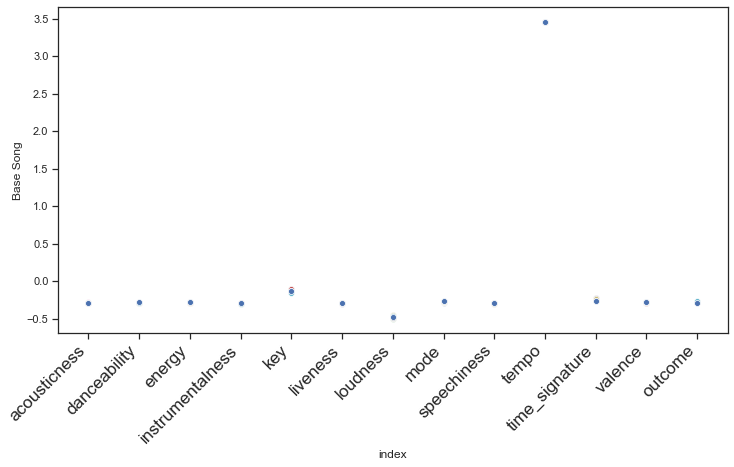

In [55]:

plt.figure(figsize=(12,6))


scatter0 = sns.scatterplot(x='index', y='Recomendation 1', data =extendend_result_for_plot)
scatter1 = sns.scatterplot(x='index', y='Recomendation 2', data =extendend_result_for_plot)
scatter2 = sns.scatterplot(x='index', y='Recomendation 3', data =extendend_result_for_plot)
scatter3 = sns.scatterplot(x='index', y='Recomendation 4', data =extendend_result_for_plot)
scatter4 = sns.scatterplot(x='index', y='Recomendation 5', data =extendend_result_for_plot)
scatter5 = sns.scatterplot(x='index', y='Recomendation 6', data =extendend_result_for_plot)
scatter6 = sns.scatterplot(x='index', y='Recomendation 7', data =extendend_result_for_plot)
scatter7 = sns.scatterplot(x='index', y='Recomendation 8', data =extendend_result_for_plot)
scatter8 = sns.scatterplot(x='index', y='Recomendation 9', data =extendend_result_for_plot)
scatter9 = sns.scatterplot(x='index', y='Recomendation 10', data =extendend_result_for_plot)
scatter10 = sns.scatterplot(x='index', y='Base Song', data =extendend_result_for_plot)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

In [57]:
fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=['acousticness','danceability','energy','instrumentalness',
                      'key', 'liveness', 'loudness','mode','speechiness', 'tempo',
                      'time_signature','valence'], y=extendend_result.iloc[10,:],
                    mode='markers',
                    name='Actual fav'))

fig.add_trace(go.Scatter(x=['acousticness','danceability','energy','instrumentalness',
                      'key', 'liveness', 'loudness','mode','speechiness', 'tempo',
                      'time_signature','valence'], y=extendend_result.iloc[0,:],
                    mode='markers',
                    name='Recomendation 1'))

fig.add_trace(go.Scatter(x=['acousticness','danceability','energy','instrumentalness',
                      'key', 'liveness', 'loudness','mode','speechiness', 'tempo',
                      'time_signature','valence'], y=extendend_result.iloc[1,:],
                    mode='markers',
                    name='Recomendation 2'))

fig.add_trace(go.Scatter(x=['acousticness','danceability','energy','instrumentalness',
                      'key', 'liveness', 'loudness','mode','speechiness', 'tempo',
                      'time_signature','valence'], y=extendend_result.iloc[2,:],
                    mode='markers',
                    name='Recomendation 3'))

fig.add_trace(go.Scatter(x=['acousticness','danceability','energy','instrumentalness',
                      'key', 'liveness', 'loudness','mode','speechiness', 'tempo',
                      'time_signature','valence'], y=extendend_result.iloc[3,:],
                    mode='markers',
                    name='Recomendation 4'))

fig.add_trace(go.Scatter(x=['acousticness','danceability','energy','instrumentalness',
                      'key', 'liveness', 'loudness','mode','speechiness', 'tempo',
                      'time_signature','valence'], y=extendend_result.iloc[4,:],
                    mode='markers',
                    name='Recomendation 5'))

fig.add_trace(go.Scatter(x=['acousticness','danceability','energy','instrumentalness',
                      'key', 'liveness', 'loudness','mode','speechiness', 'tempo',
                      'time_signature','valence'], y=extendend_result.iloc[5,:],
                    mode='markers',
                    name='Recomendation 6'))

fig.add_trace(go.Scatter(x=['acousticness','danceability','energy','instrumentalness',
                      'key', 'liveness', 'loudness','mode','speechiness', 'tempo',
                      'time_signature','valence'], y=extendend_result.iloc[6,:],
                    mode='markers',
                    name='Recomendation 7'))
              
fig.add_trace(go.Scatter(x=['acousticness','danceability','energy','instrumentalness',
                      'key', 'liveness', 'loudness','mode','speechiness', 'tempo',
                      'time_signature','valence'], y=extendend_result.iloc[7,:],
                    mode='markers',
                    name='Recomendation 8'))
              
fig.add_trace(go.Scatter(x=['acousticness','danceability','energy','instrumentalness',
                      'key', 'liveness', 'loudness','mode','speechiness', 'tempo',
                      'time_signature','valence'], y=extendend_result.iloc[6,:],
                    mode='markers',
                    name='Recomendation 9'))
              
fig.add_trace(go.Scatter(x=['acousticness','danceability','energy','instrumentalness',
                      'key', 'liveness', 'loudness','mode','speechiness', 'tempo',
                      'time_signature','valence'], y=extendend_result.iloc[7,:],
                    mode='markers',
                    name='Recomendation 10'))

py.iplot(fig, filename='features', sharing='public')

In [69]:

figs = make_subplots(rows=3, cols=4, shared_yaxes=True)

figs.add_trace(go.Scatter(x=extendend_result_for_plot.index, y=extendend_result['acousticness']),
              row=1, col=1)

figs.add_trace(go.Scatter(x=extendend_result_for_plot.index, y=extendend_result['danceability']),
              row=1, col=2)

figs.add_trace(go.Scatter(x=extendend_result_for_plot.index, y=extendend_result['key']),
              row=2, col=1)

figs.add_trace(go.Scatter(x=extendend_result_for_plot.index, y=extendend_result['loudness']),
              row=2, col=2)

figs.update_layout(height=600, width=600,
                  title_text="Multiple Subplots with Shared Y-Axes")

py.iplot(figs, filename='subplots', sharing='public')

In [67]:
extendend_result

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,outcome
0,0.00428,0.533,0.469,0.013300,9.0,0.3260,-8.786,0.0,0.1400,185.664,3.0,0.330,1
1,0.60300,0.306,0.310,0.000027,11.0,0.1120,-10.371,1.0,0.0336,207.508,3.0,0.126,1
2,0.34300,0.492,0.527,0.000000,9.0,0.1210,-9.490,1.0,0.1170,177.874,3.0,0.407,1
3,0.54900,0.504,0.311,0.000001,11.0,0.1900,-10.594,1.0,0.0460,207.019,3.0,0.466,1
4,0.66700,0.463,0.512,0.000129,8.0,0.0815,-7.305,1.0,0.0501,181.726,3.0,0.831,1
5,0.08860,0.417,0.534,0.000943,7.0,0.0901,-9.517,1.0,0.0374,178.630,3.0,0.602,1
6,0.70200,0.595,0.473,0.000000,8.0,0.0725,-9.828,1.0,0.0347,204.016,4.0,0.716,1
7,0.26800,0.481,0.561,0.013700,7.0,0.2550,-9.101,1.0,0.0498,170.908,3.0,0.834,1
8,0.44000,0.485,0.483,0.000122,8.0,0.2270,-7.877,1.0,0.0519,195.009,3.0,0.891,1
9,0.15800,0.476,0.933,0.000030,5.0,0.1270,-5.762,1.0,0.3990,130.471,1.0,0.694,1


# Draft section

In [151]:
help(sp.user_playlist)

Help on method user_playlist in module spotipy.client:

user_playlist(user, playlist_id=None, fields=None, market=None) method of spotipy.client.Spotify instance



In [207]:
len(sp.user_playlists(user=12125120773)['items'])

32

In [168]:
sp.user_playlist(user=12125120773,playlist_id='5u29iIDT3bBUwusA9Zfq4w')['tracks']['next']

'https://api.spotify.com/v1/playlists/5u29iIDT3bBUwusA9Zfq4w/tracks?offset=100&limit=100&additional_types=track'

In [188]:
sp.playlist_tracks(playlist_id='5u29iIDT3bBUwusA9Zfq4w')['total']

510

In [196]:
sp.playlist_tracks(playlist_id='5u29iIDT3bBUwusA9Zfq4w',offset=0)['items'][0]

{'added_at': '2017-02-27T17:07:06Z',
 'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/12125120773'},
  'href': 'https://api.spotify.com/v1/users/12125120773',
  'id': '12125120773',
  'type': 'user',
  'uri': 'spotify:user:12125120773'},
 'is_local': False,
 'primary_color': None,
 'track': {'album': {'album_type': 'album',
   'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3v8mFhjLFa50QK8zDvAMYN'},
     'href': 'https://api.spotify.com/v1/artists/3v8mFhjLFa50QK8zDvAMYN',
     'id': '3v8mFhjLFa50QK8zDvAMYN',
     'name': 'Amanda Miguel',
     'type': 'artist',
     'uri': 'spotify:artist:3v8mFhjLFa50QK8zDvAMYN'}],
   'available_markets': [],
   'external_urls': {'spotify': 'https://open.spotify.com/album/1NKOp3Ct4RzmSGIApAKkS6'},
   'href': 'https://api.spotify.com/v1/albums/1NKOp3Ct4RzmSGIApAKkS6',
   'id': '1NKOp3Ct4RzmSGIApAKkS6',
   'images': [{'height': 640,
     'url': 'https://i.scdn.co/image/ab67616d0000b2730cba7428728ddbdca4f

In [178]:
help(sp.playlist_tracks)

Help on method playlist_tracks in module spotipy.client:

playlist_tracks(playlist_id, fields=None, limit=100, offset=0, market=None, additional_types=('track',)) method of spotipy.client.Spotify instance
    Get full details of the tracks of a playlist.
    
    Parameters:
        - playlist_id - the id of the playlist
        - fields - which fields to return
        - limit - the maximum number of tracks to return
        - offset - the index of the first track to return
        - market - an ISO 3166-1 alpha-2 country code.
        - additional_types - list of item types to return.
                             valid types are: track and episode



In [202]:
songs[songs['artists']=='KAROL G']

,id,song_id,song_name,artists,album,popularity,explicit,track_number,danceability,energy,...,acousticness,instrumentalness,liveness,valence,tempo,song_type,duration_ms,time_signature,preview_url,similar_songs
1,2,7k4t7uLgtOxPwTpFmtJNTY,Tusa,KAROL G,Tusa,89,False,1,0.803,0.715,...,0.29500,0.000134,0.0574,0.574,101.085,audio_features,200960,4,None,None
513,510,7x4ASXYEKfQBCewcZhK776,"Ay, DiOs Mío!",KAROL G,"Ay, DiOs Mío!",93,False,1,0.718,0.712,...,0.51200,0.001210,0.1040,0.531,180.034,audio_features,189653,4,None,None
3277,3275,78mpFgPXtqFccYQpSTNRX6,La Dama,KAROL G,Unstoppable,52,False,2,0.845,0.777,...,0.12100,0.000145,0.0921,0.732,100.010,audio_features,208400,4,None,None
3292,3290,24snQ8Ew7aIKYCt0ulXHvx,Pineapple,KAROL G,Pineapple,0,False,1,0.782,0.671,...,0.05080,0.000002,0.3880,0.667,94.981,audio_features,178347,4,None,None
3297,3295,3kVNzaukrW537D2zSVanGg,Tu Pum Pum,KAROL G,Tu Pum Pum,52,False,1,0.755,0.829,...,0.11400,0.000007,0.2050,0.734,89.600,audio_features,221120,4,None,None
3307,3305,7sFYVcKSb24qg0dAkqLEFj,Mi Cama,KAROL G,Mi Cama,62,False,1,0.826,0.815,...,0.22200,0.000070,0.0964,0.680,163.073,audio_features,151400,4,None,None
3310,3308,0alSPoUfrGb0RdVVG4Lf3n,Ahora Me Llama,KAROL G,Unstoppable,64,False,6,0.646,0.573,...,0.00949,0.000040,0.0932,0.109,134.979,audio_features,235227,4,None,None
3556,3553,5Lb1pjnll07UQKxNpnnGBy,Punto G,KAROL G,Punto G,60,False,1,0.787,0.751,...,0.00796,0.000139,0.0857,0.926,165.961,audio_features,181587,4,None,None
3581,3580,75myWkNUTahMKBbP6xCOlt,Go Karo,KAROL G,OCEAN,49,False,14,0.746,0.727,...,0.04650,0.000001,0.0793,0.826,93.037,audio_features,149867,4,None,None
